In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from mpl_toolkits.basemap import Basemap
import seawater as sw
import datetime
%matplotlib inline

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
run1 = xr.open_dataset('/home/soontiensn/data/gpsc-work2/OPP/opendrift_test/DriftMap/ciops_linear_oceanmodel/output/sndist_od_2016060800_P10D.nc')
run2 = xr.open_dataset('/home/soontiensn/data/gpsc-work2/OPP/opendrift_test/DriftMap/ciops_linear_basemap/output/sndist_od_2016060800_P10D.nc')


In [3]:
run1

<xarray.Dataset>
Dimensions:     (model_run: 221, time: 241)
Coordinates:
  * time        (time) datetime64[ns] 2016-06-08 ... 2016-06-18
Dimensions without coordinates: model_run
Data variables:
    mod_lat     (model_run, time) float32 ...
    mod_lon     (model_run, time) float32 ...
    mod_dist    (model_run, time) float64 ...
    mod_disp    (model_run, time) float64 ...
    track_dist  (model_run, time) float64 ...
    ratio       (model_run, time) float64 ...
Attributes:
    mod_Conventions:                                  CF-1.6
    mod_standard_name_vocabulary:                     CF-1.6
    mod_featureType:                                  trajectory
    mod_history:                                      Created 2019-12-20 12:5...
    mod_source:                                       Output from simulation ...
    mod_model_url:                                    https://github.com/Open...
    mod_opendrift_class:                              OceanDrift
    mod_opendrift_mod

In [4]:
start = datetime.datetime(2016,6,8)
dates = [start + datetime.timedelta(days=n) for n in range(10)]
dates.append(run2.time.values[-1])
dist = np.zeros((run2.mod_lon.shape[0],len(dates)))
for n, d in enumerate(dates):
    run2_sel = run2.sel(time=d)
    run1_sel = run1.sel(time=d)
    for p in range(dist.shape[0]):
        lat = np.array([run2_sel.mod_lat.values[p], run1_sel.mod_lat.values[p]])
        lon = np.array([run2_sel.mod_lon.values[p], run1_sel.mod_lon.values[p]])
        dist[p, n] = sw.dist(lat,lon)[0] # distance defualts in km

In [5]:
def plot_Scatter(bmap, dist, lat_orig, lon_orig):
    x, y = bmap(lon_orig, lat_orig)
    mesh = bmap.scatter(x,y,c=dist)
    cbar=plt.colorbar(mesh,ax=ax)
    cbar.set_label('separation [km]', fontsize=16)
    cbar.ax.tick_params(labelsize=16)
    bmap.drawcoastlines()

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


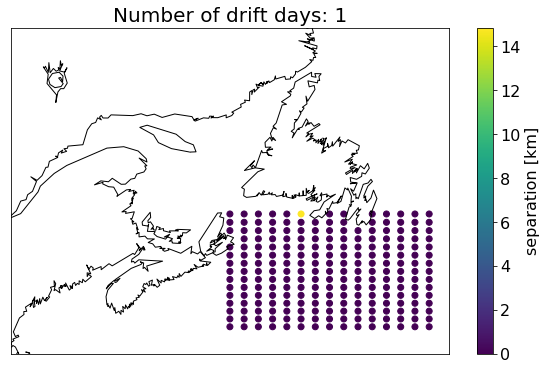

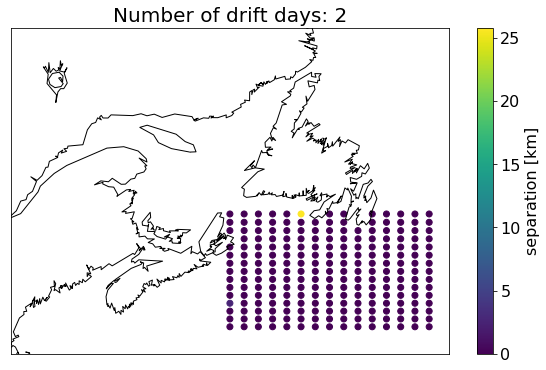

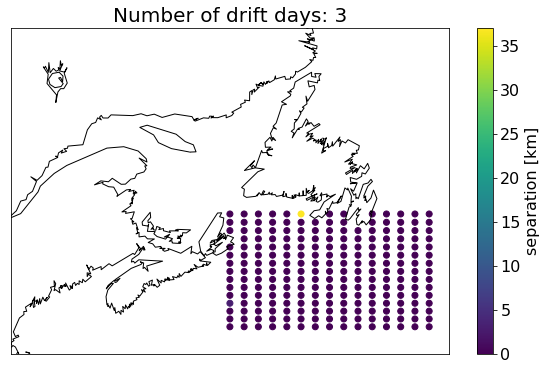

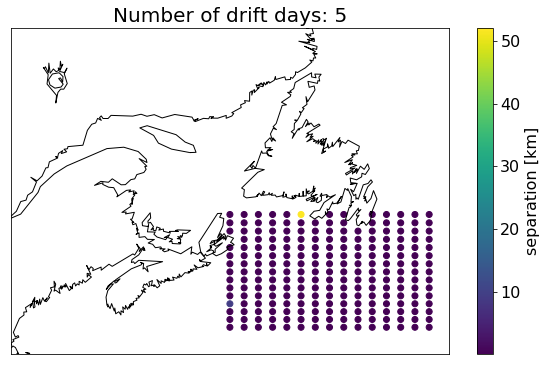

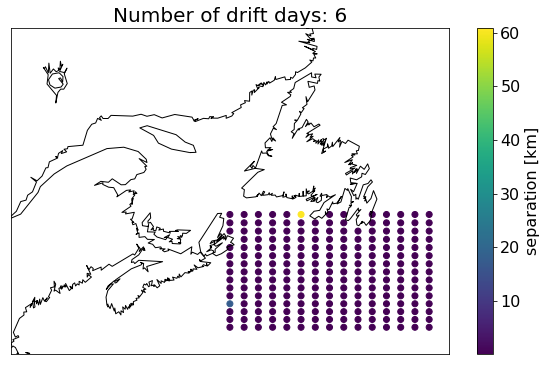

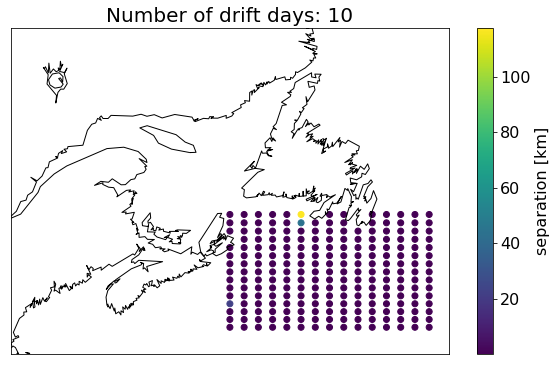

In [6]:
init_lon=run2.mod_lon.values[:,0]
init_lat=run2.mod_lat.values[:,0]
for n, date in enumerate(dates):
    fig,ax = plt.subplots(1,1, figsize=(10,6))
    m = Basemap(projection='merc',llcrnrlat=42,urcrnrlat=53,llcrnrlon=-71,urcrnrlon=-49,resolution='l')
    plot_Scatter(m, dist[:,n],init_lat,init_lon)
    ax.set_title('Number of drift days: {}'.format(n), fontsize=20)

In [7]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.plot(dates,np.nanmax(dist, axis=0))
ax.set_ylabel('Maximum separation [km]')
ax.grid()

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [8]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.plot(dates,np.nanmin(dist, axis=0))
ax.set_ylabel('Minimum separation [km]')
ax.grid()

In [9]:
fig,ax=plt.subplots(1,1,figsize=(12,8))

ax.set_ylabel('Separation [km]', fontsize=20)
for i in range(dist.shape[0]):
    ax.plot(dates,dist[i], c='C0',alpha=0.5)
ax.plot(dates,np.nanmedian(dist, axis=0),c='C1',lw=3)
ax.grid()
#fake legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='C1', lw=3)]
ax.legend(custom_lines, ['Median'],fontsize=16)
ax.tick_params(axis='both', labelsize=20)
fig.autofmt_xdate()


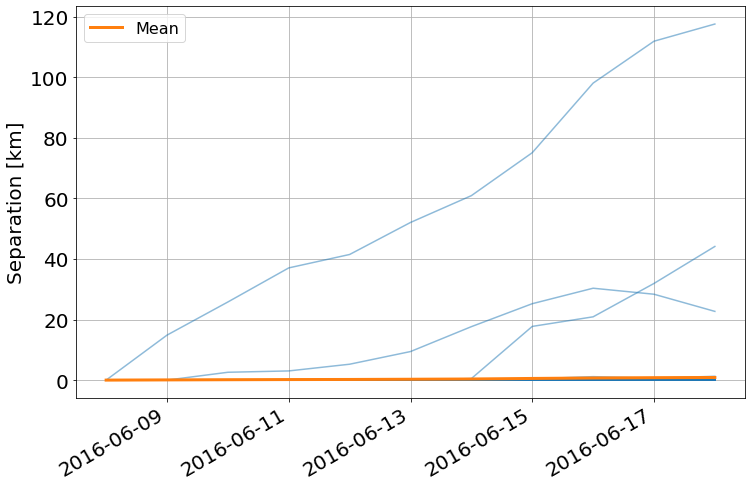

In [10]:
fig,ax=plt.subplots(1,1,figsize=(12,8))

ax.set_ylabel('Separation [km]', fontsize=20)
for i in range(dist.shape[0]):
    ax.plot(dates,dist[i], c='C0',alpha=0.5)
ax.plot(dates,np.nanmean(dist, axis=0),c='C1',lw=3)
ax.grid()
#fake legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='C1', lw=3)]
ax.legend(custom_lines, ['Mean'],fontsize=16)
ax.tick_params(axis='both', labelsize=20)
fig.autofmt_xdate()

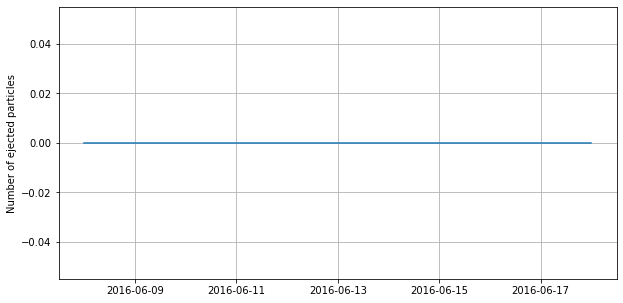

In [11]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.plot(dates,np.count_nonzero(np.isnan(dist), axis=0))
ax.set_ylabel('Number of ejected particles')
ax.grid()

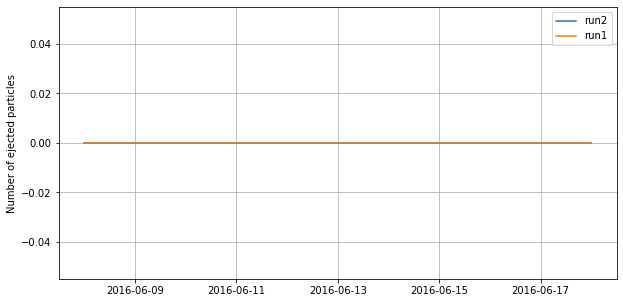

In [12]:
dummy_run2 = np.zeros((run2.mod_lon.shape[0],len(dates)))
dummy_run1 = np.zeros((run1.mod_lon.shape[0],len(dates)))
for n, d in enumerate(dates):
    run2_sel = run2.sel(time=d)
    run1_sel = run1.sel(time=d)
    dummy_run2[:, n] = run2_sel.mod_lon.values
    dummy_run1[:, n] = run1_sel.mod_lon.values
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.plot(dates,np.count_nonzero(np.isnan(dummy_run2), axis=0),label='run2')
ax.plot(dates,np.count_nonzero(np.isnan(dummy_run1), axis=0),label='run1')
ax.set_ylabel('Number of ejected particles')
ax.legend()
ax.grid()

How do I isolate which of these particles are on land?

In [13]:
def plot_Scatter(bmap, lat1,lon1, lat2, lon2):
    x1, y1 = bmap(lon1, lat1)
    x2, y2 = bmap(lon2, lat2)
    bmap.plot(x1,y1,'.C0',ms=1)
    bmap.plot(x2,y2,'.C1',ms=1)
    bmap.drawcoastlines()

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


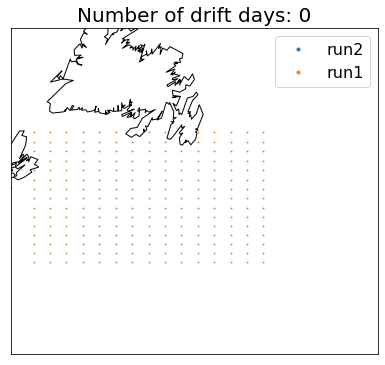

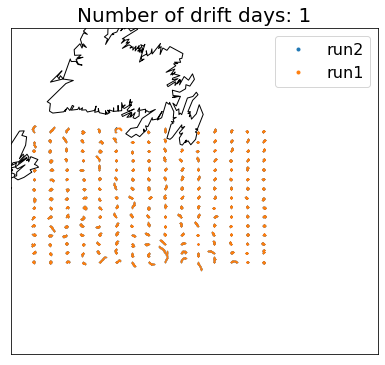

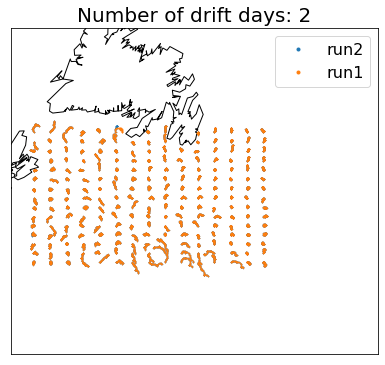

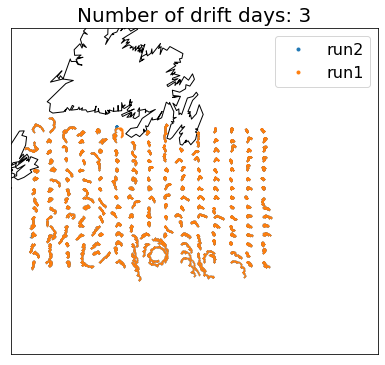

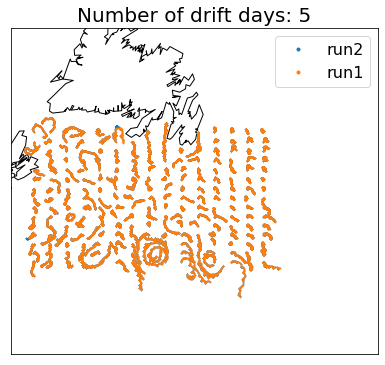

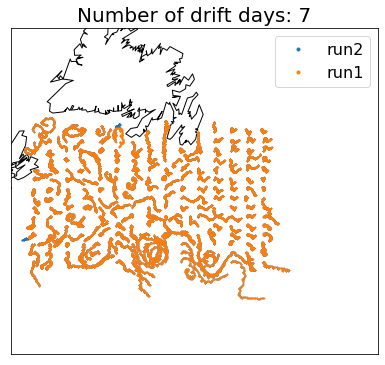

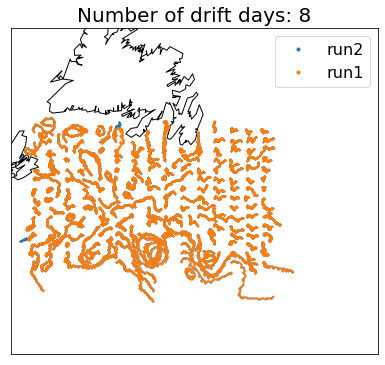

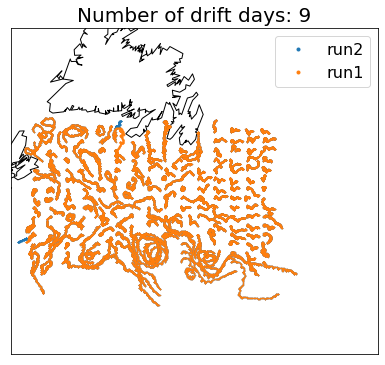

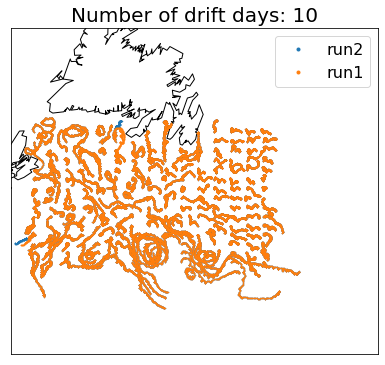

In [14]:
start=dates[0]
for n, date in enumerate(dates):
    fig,ax = plt.subplots(1,1, figsize=(10,6))
    m = Basemap(projection='merc',llcrnrlat=40,urcrnrlat=50,llcrnrlon=-61,urcrnrlon=-45,resolution='l')
    lat_run2 = run2.sel(time=slice(start,date)).mod_lat.values
    lon_run2 = run2.sel(time=slice(start,date)).mod_lon.values
    lat_run1 = run1.sel(time=slice(start,date)).mod_lat.values
    lon_run1 = run1.sel(time=slice(start,date)).mod_lon.values
    plot_Scatter(m, lat_run2,lon_run2, lat_run1,lon_run1)
    ax.set_title('Number of drift days: {}'.format(n), fontsize=20)
        # fake legend
    custom_lines = [Line2D([0], [0], marker='.', color='C0', lw=0),
                    Line2D([0], [0], marker='.', color='C1', lw=0)]
    ax.legend(custom_lines, ['run2', 'run1'],fontsize=16)

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


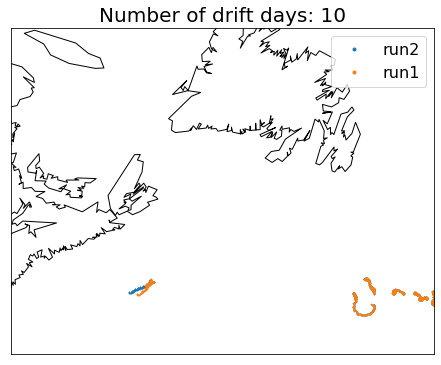

In [15]:
    ind1=40
    ind2=46
    date=dates[-1]
    fig,ax = plt.subplots(1,1, figsize=(10,6))
    m = Basemap(projection='merc',llcrnrlat=42,urcrnrlat=50,llcrnrlon=-65,urcrnrlon=-50,resolution='l')
    lat_run2 = run2.sel(time=slice(start,date)).mod_lat.values[ind1:ind2]
    lon_run2 = run2.sel(time=slice(start,date)).mod_lon.values[ind1:ind2]
    lat_run1 = run1.sel(time=slice(start,date)).mod_lat.values[ind1:ind2]
    lon_run1 = run1.sel(time=slice(start,date)).mod_lon.values[ind1:ind2]
    plot_Scatter(m, lat_run2,lon_run2, lat_run1,lon_run1)
    ax.set_title('Number of drift days: {}'.format(n), fontsize=20)
        # fake legend
    custom_lines = [Line2D([0], [0], marker='.', color='C0', lw=0),
                    Line2D([0], [0], marker='.', color='C1', lw=0)]
    ax.legend(custom_lines, ['run2', 'run1'],fontsize=16)

In [16]:
run2.mod_lat.values[199,:]

array([46.714287, 46.72512 , 46.737507, 46.75088 , 46.764618, 46.777557,
       46.788788, 46.797836, 46.804234, 46.808414, 46.81109 , 46.81239 ,
       46.812763, 46.81244 , 46.81175 , 46.81098 , 46.810337, 46.809753,
       46.80945 , 46.80962 , 46.810383, 46.81239 , 46.816612, 46.823666,
       46.833378, 46.84534 , 46.859203, 46.874905, 46.891502, 46.907448,
       46.922062, 46.934597, 46.943993, 46.949524, 46.95114 , 46.948807,
       46.943066, 46.934566, 46.923878, 46.911728, 46.898884, 46.88621 ,
       46.874584, 46.865395, 46.859066, 46.855473, 46.85471 , 46.856785,
       46.86119 , 46.867714, 46.876293, 46.88643 , 46.897892, 46.910225,
       46.92273 , 46.934666, 46.945522, 46.954052, 46.95903 , 46.960625,
       46.95934 , 46.95554 , 46.949604, 46.942112, 46.93392 , 46.925762,
       46.918156, 46.911697, 46.906635, 46.90265 , 46.89997 , 46.899097,
       46.90024 , 46.903473, 46.90875 , 46.915863, 46.924873, 46.935055,
       46.94527 , 46.954853, 46.963554, 46.970757, 

In [17]:
run2.mod_lat.values[213,:]

array([47.      , 47.017185, 47.034378, 47.052296, 47.06994 , 47.085728,
       47.098732, 47.109444, 47.118206, 47.120174, 47.120174, 47.120174,
       47.120174, 47.120174, 47.120174, 47.120174, 47.120174, 47.120174,
       47.120174, 47.120174, 47.120174, 47.120174, 47.1202  , 47.120613,
       47.122833, 47.12615 , 47.13083 , 47.137012, 47.143913, 47.150658,
       47.157356, 47.163773, 47.169632, 47.17455 , 47.17818 , 47.180458,
       47.181343, 47.180843, 47.179314, 47.177364, 47.175648, 47.1748  ,
       47.174847, 47.175556, 47.176636, 47.177826, 47.178795, 47.17934 ,
       47.17921 , 47.178196, 47.17654 , 47.174763, 47.17342 , 47.17298 ,
       47.173744, 47.17567 , 47.178307, 47.18129 , 47.18425 , 47.186802,
       47.1888  , 47.190044, 47.19016 , 47.189304, 47.187794, 47.18613 ,
       47.18457 , 47.183006, 47.181206, 47.178486, 47.174973, 47.170666,
       47.165905, 47.161373, 47.15768 , 47.15516 , 47.154182, 47.154526,
       47.155807, 47.157803, 47.16013 , 47.162315, 

In [18]:
run2.mod_lat.values[45,:]

array([43.857143, 43.870884, 43.879696, 43.882023, 43.87987 , 43.87571 ,
       43.87153 , 43.867878, 43.865623, 43.865627, 43.868225, 43.87314 ,
       43.8793  , 43.885212, 43.888786, 43.887848, 43.88333 , 43.87673 ,
       43.86977 , 43.863705, 43.859703, 43.859676, 43.86601 , 43.87999 ,
       43.89968 , 43.920414, 43.93023 , 43.93023 , 43.93023 , 43.93023 ,
       43.929085, 43.917904, 43.90416 , 43.89161 , 43.88294 , 43.879696,
       43.881615, 43.886173, 43.889896, 43.889893, 43.885185, 43.87662 ,
       43.86627 , 43.856117, 43.847652, 43.84196 , 43.840263, 43.843822,
       43.8531  , 43.866764, 43.88139 , 43.89251 , 43.89795 , 43.896873,
       43.89004 , 43.879913, 43.8685  , 43.85732 , 43.847263, 43.839645,
       43.83643 , 43.836433, 43.837532, 43.837494, 43.834084, 43.827442,
       43.818733, 43.80935 , 43.800636, 43.793407, 43.78853 , 43.787067,
       43.78968 , 43.7965  , 43.806458, 43.817184, 43.82539 , 43.828663,
       43.826706, 43.8204  , 43.811413, 43.801003, 

In [19]:
run2

<xarray.Dataset>
Dimensions:     (model_run: 221, time: 241)
Coordinates:
  * time        (time) datetime64[ns] 2016-06-08 ... 2016-06-18
Dimensions without coordinates: model_run
Data variables:
    mod_lat     (model_run, time) float32 43.0 42.996113 ... 46.966812 46.97049
    mod_lon     (model_run, time) float32 -60.0 -60.005863 ... -49.71086
    mod_dist    (model_run, time) float64 ...
    mod_disp    (model_run, time) float64 ...
    track_dist  (model_run, time) float64 ...
    ratio       (model_run, time) float64 ...
Attributes:
    mod_Conventions:                                  CF-1.6
    mod_standard_name_vocabulary:                     CF-1.6
    mod_featureType:                                  trajectory
    mod_history:                                      Created 2019-12-19 16:4...
    mod_source:                                       Output from simulation ...
    mod_model_url:                                    https://github.com/Open...
    mod_opendrift_class: 

In [20]:
diffs = run2.mod_lon.diff('time')

In [21]:
inds = np.where(diffs==0)
inds

(array([  4,  15,  45,  45,  45,  48,  79, 117, 143, 147, 160, 173, 182,
        182, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199,
        199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199,
        199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199,
        199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199,
        199, 199, 199, 199, 199, 199, 200, 213, 213, 213, 213, 213, 213,
        213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213,
        213, 213, 213, 213, 220, 220]),
 array([ 87,  59,  26,  27,  28, 229,  27, 186, 116, 207, 120, 133, 103,
        227, 144, 145, 146, 147, 148, 149, 151, 152, 153, 154, 155, 185,
        186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
        199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,
        212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224,
        225, 228, 229, 230, 231, 232,  88,   9,  10,  11,  12,  13,  14,
         15

In [22]:
run2.mod_lon.values[199,144:]

array([-56.40246 , -56.40246 , -56.40246 , -56.40246 , -56.40246 ,
       -56.40246 , -56.40246 , -56.402   , -56.402   , -56.402   ,
       -56.402   , -56.402   , -56.402   , -56.402626, -56.405476,
       -56.408825, -56.411903, -56.414852, -56.417797, -56.420967,
       -56.424744, -56.42904 , -56.43348 , -56.437572, -56.44104 ,
       -56.444126, -56.44704 , -56.449593, -56.450817, -56.449986,
       -56.447086, -56.442806, -56.437782, -56.43253 , -56.427647,
       -56.423214, -56.418964, -56.414703, -56.410625, -56.407036,
       -56.403683, -56.40044 , -56.40044 , -56.40044 , -56.40044 ,
       -56.40044 , -56.40044 , -56.40044 , -56.40044 , -56.40044 ,
       -56.40044 , -56.40044 , -56.40044 , -56.40044 , -56.40044 ,
       -56.40044 , -56.40044 , -56.40044 , -56.40044 , -56.40044 ,
       -56.40044 , -56.40044 , -56.40044 , -56.40044 , -56.40044 ,
       -56.40044 , -56.40044 , -56.40044 , -56.40044 , -56.40044 ,
       -56.40044 , -56.40044 , -56.40044 , -56.40044 , -56.400